<a href="https://www.kaggle.com/marawankhaled/arabic-handwritten-characters-recognition?scriptVersionId=90209200" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
train_images = pd.read_csv('../input/ahcd1/csvTrainImages 13440x1024.csv')
train_label = pd.read_csv('../input/ahcd1/csvTrainLabel 13440x1.csv')

test_images = pd.read_csv('../input/ahcd1/csvTestImages 3360x1024.csv')
test_label = pd.read_csv('../input/ahcd1/csvTestLabel 3360x1.csv')

In [3]:
train_label = train_label -1
test_label = test_label -1

In [4]:
train_images.shape, train_label.shape

((13439, 1024), (13439, 1))

In [5]:
X_train = train_images.to_numpy().reshape(-1, 32, 32,1)
y_train = train_label.to_numpy()

X_test = test_images.to_numpy().reshape(-1, 32, 32,1)
y_test = test_label.to_numpy()

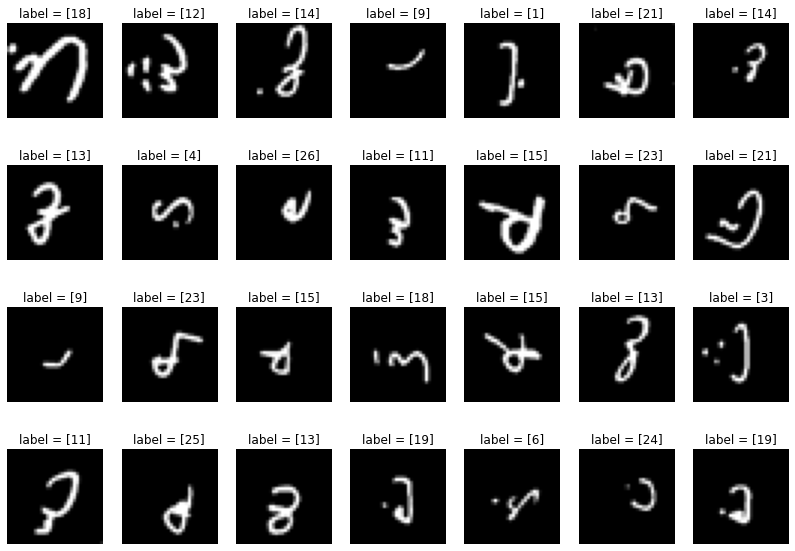

In [6]:
fig, ax = plt.subplots(4, 7, figsize=(14, 10))

for row in range(4):
    for col in range(7):
        i  = np.random.randint(0,X_train.shape[0])
        plt.sca(ax[row, col])
        plt.title(f'label = {y_train[i]}')
#         img = plt.imread(TRAIN_DIRECTORY+train_df.iloc[img_index[i]]["id_ext"])
        plt.imshow(X_train[i],cmap='gray')
        plt.axis('off')
#         i+=1

In [7]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [8]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [9]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(32,32, 1)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(128),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(512),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(128, 0.5),
        tf.keras.layers.Dropout(0.4),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(28, activation='softmax')
    ])
    
    return model

In [10]:
model = build_model()
model.summary()

2022-03-15 20:34:00.645027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 20:34:00.733351: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 20:34:00.734056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 20:34:00.735190: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
sequential (Sequential)      (None, 8, 8, 128)         166656    
_________________________________________________________________
sequential_1 (Sequential)    (None, 4, 4, 256)         886272    
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 256)         0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 2, 2, 512)        

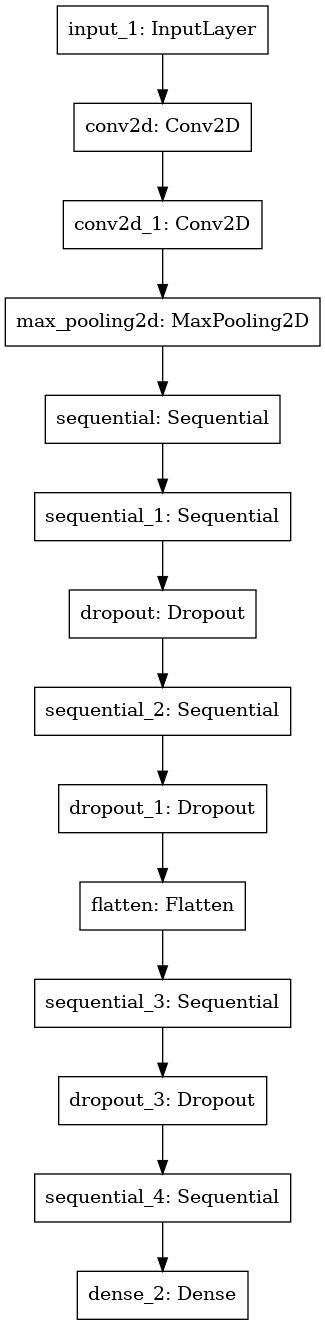

In [11]:
tf.keras.utils.plot_model(
    model
)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

In [13]:
history = model.fit(X_train, y_train, batch_size=256, epochs=40,
                 validation_data=(X_test, y_test), shuffle=True,
                                        callbacks=[callback]

                )

2022-03-15 20:34:04.377311: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-03-15 20:34:06.300333: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


53/53 [==============================] - 10s 45ms/step - loss: 3.5291 - accuracy: 0.0964 - val_loss: 3.2714 - val_accuracy: 0.0607
Epoch 2/40
53/53 [==============================] - 2s 29ms/step - loss: 2.8826 - accuracy: 0.1890 - val_loss: 2.8570 - val_accuracy: 0.1524
Epoch 3/40
53/53 [==============================] - 2s 29ms/step - loss: 2.5153 - accuracy: 0.2618 - val_loss: 2.5655 - val_accuracy: 0.3090
Epoch 4/40
53/53 [==============================] - 2s 28ms/step - loss: 2.2575 - accuracy: 0.3343 - val_loss: 2.1965 - val_accuracy: 0.4570
Epoch 5/40
53/53 [==============================] - 2s 29ms/step - loss: 2.0336 - accuracy: 0.3898 - val_loss: 1.9198 - val_accuracy: 0.5645
Epoch 6/40
53/53 [==============================] - 2s 29ms/step - loss: 1.8388 - accuracy: 0.4563 - val_loss: 1.6572 - val_accuracy: 0.6615
Epoch 7/40
53/53 [==============================] - 2s 29ms/step - loss: 1.6896 - accuracy: 0.4980 - val_loss: 1.4483 - val_accuracy: 0.6907
Epoch 8/40
53/53 [=====

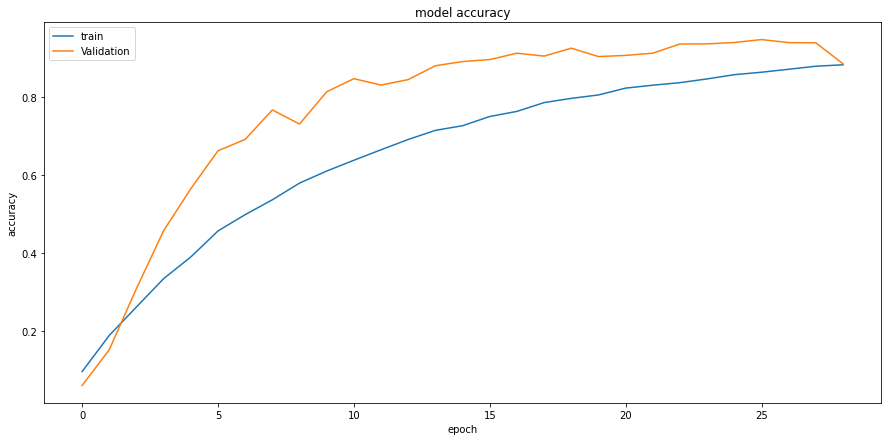

In [14]:
plt.figure(figsize=(15,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


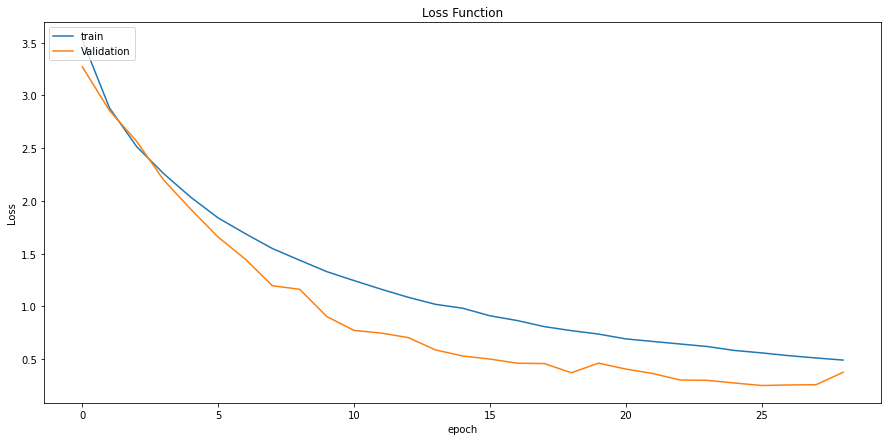

In [15]:
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
